In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data=pd.read_csv('car_age_price.csv')

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.describe().round(2)

,Year,Price
count,112.00,112.00
mean,2016.67,483866.04
std,1.63,91217.45
min,2013.00,300000.00
25%,2015.00,423750.00
50%,2017.00,500000.00
75%,2017.00,550000.00
max,2020.00,755000.00


In [6]:
##Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
##Checking missing values
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [8]:
##Checking for duplicate values
data.duplicated().count()

112

           Year     Price
Year   1.000000  0.776302
Price  0.776302  1.000000


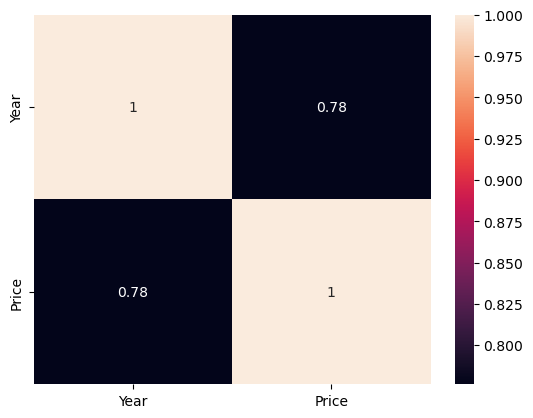

In [11]:
##Checking correlation between the parameters
print(data.corr())
sns.heatmap(data.corr(),annot=True)
plt.show()

(array([12.,  8., 12., 13., 32., 23.,  7.,  2.,  2.,  1.]),
 array([300000., 345500., 391000., 436500., 482000., 527500., 573000.,
        618500., 664000., 709500., 755000.]),
 <BarContainer object of 10 artists>)

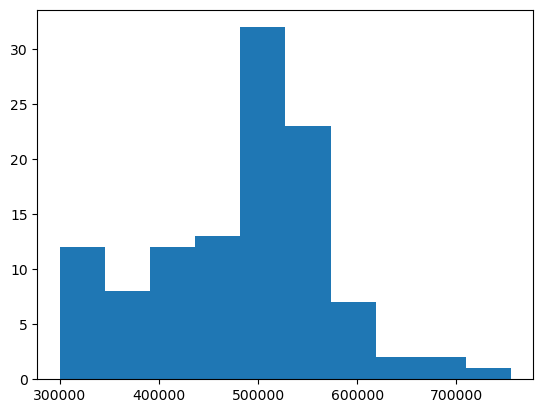

In [12]:
##Checking the distribution
plt.hist(data['Price'])

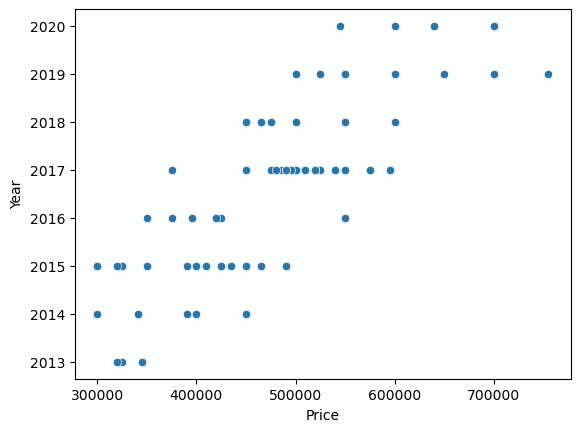

In [14]:
##Scatter plot diagram for checking the general trend in data
sns.scatterplot(data=data,x='Price',y='Year')
plt.show()

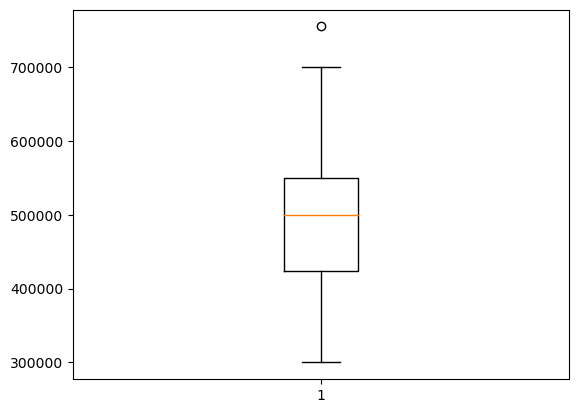

In [15]:
##Checking for outliers in Price
plt.boxplot(data['Price'])
plt.show()

In [ ]:
##Finding IQR in price

In [16]:
from sklearn.utils import DataConversionWarning
IQR=stats.iqr(data['Price'])
Q1=data['Price'].quantile(0.25)
Q3=data['Price'].quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR


In [17]:
##Finding outliers < minimum

data.loc[data.Price<min_limit]

,Year,Price


In [18]:
##Finding outliers > Maximum

data.loc[data.Price>max_limit]

,Year,Price
1,2019,755000


In [19]:
##Replacing the outlier with mean of 'Price'

data.loc[data['Price']>max_limit,'Price']=np.mean(data.Price)

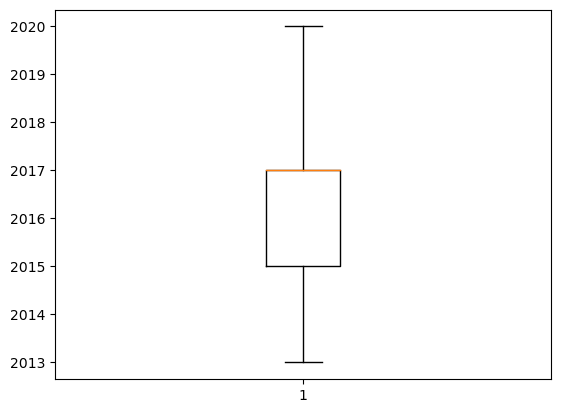

In [20]:
##Checking for outliers in Year

plt.boxplot(data['Year'])
plt.show()

In [21]:
##Creating the linear model and prediction

x=data.drop(['Price'],axis=1)
y=data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state= 42 , test_size = 0.2)
lr = LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [22]:
##Finding the MSE and R^2 value for the model generated and the test values

print( ' Mean square error = ',mean_squared_error(y_test,predictions).round(3))
print(' R squared value = ', r2_score(y_test,predictions).round(3))

 Mean square error =  3856389421.844
 R squared value =  0.436


In [23]:
##Predicting the value

year=[[2022]]
y_pred = lr.predict(year).round(2)
print('The value of car in year 2022 = ',y_pred)

The value of car in year 2022 =  [723904.33]


C:\Users\hasna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
##Lasso model

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train).round(3)
test_score_ls =lasso.score(x_test,y_test).round(3)

print("The train score for lasso model is {}".format(train_score_ls))
print("The test score for lasso model is {}".format(test_score_ls))
prediction=lasso.predict([[2022]]).round(2)
print('The value of the car in 2022 will be : ',prediction)

The train score for lasso model is 0.619
The test score for lasso model is 0.436
The value of the car in 2022 will be :  [723881.92]


C:\Users\hasna\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:
we had predicted the price of the car by both models.
through Lasso model we got the price as 723881.92
through linear regression we got price as723881.92
both are similar